In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as skl
import time
from IPython.display import display, clear_output

import sklearn
from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


In [2]:
df = pd.read_csv('heart.csv')

# Data Exploration

In [3]:
display(df)
'''
1. age (#)
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic
4. (trestbps) resting blood pressure (#)
5. (chol) serum cholesterol in mg/dl (#)
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restecg) resting electrocardiography results(values 0,1,2)
8. (thalach) maximum heart rate achieved (#)
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no)
10. (oldpeak) = ST depression induced by exercise relative to rest (#)
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )
12. (ca) number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. (thal) maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect
target = 0 not suffering // 1 suffering
'''

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


'\n1. age (#)\n2. sex : 1= Male, 0= Female (Binary)\n3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic\n4. (trestbps) resting blood pressure (#)\n5. (chol) serum cholesterol in mg/dl (#)\n6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)\n7. (restecg) resting electrocardiography results(values 0,1,2)\n8. (thalach) maximum heart rate achieved (#)\n9. (exang) exercise induced angina (binary) (1 = yes; 0 = no)\n10. (oldpeak) = ST depression induced by exercise relative to rest (#)\n11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )\n12. (ca) number of major vessels (0–3, Ordinal) colored by fluoroscopy\n13. (thal) maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect\ntarget = 0 not suffering // 1 suffering\n'

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.isnull().sum()

In [6]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

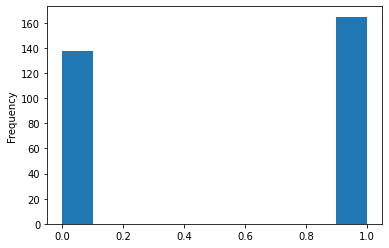

In [7]:
df.target.plot.hist();

<AxesSubplot:>

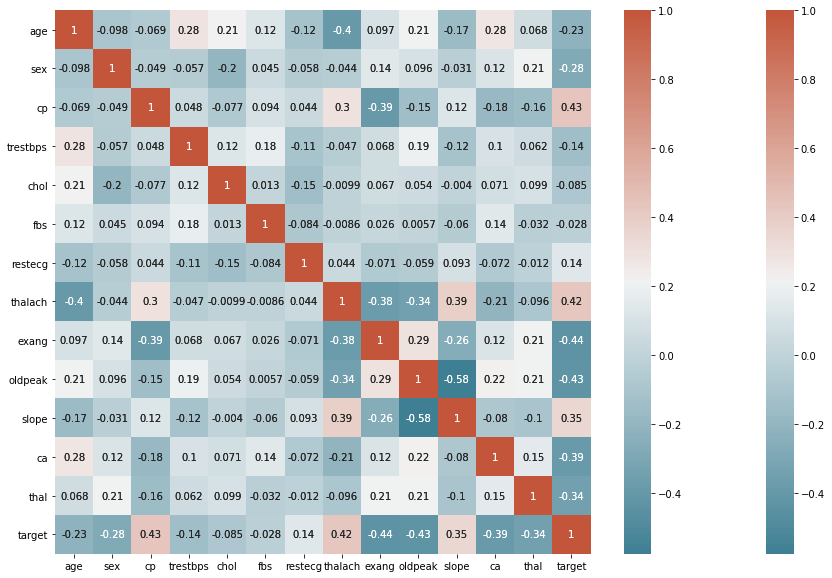

In [8]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.diverging_palette(220, 20, as_cmap=True))
sb.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sb.diverging_palette(220, 20, as_cmap=True))

Text(10.778541666666662, 0.5, 'ST depression')

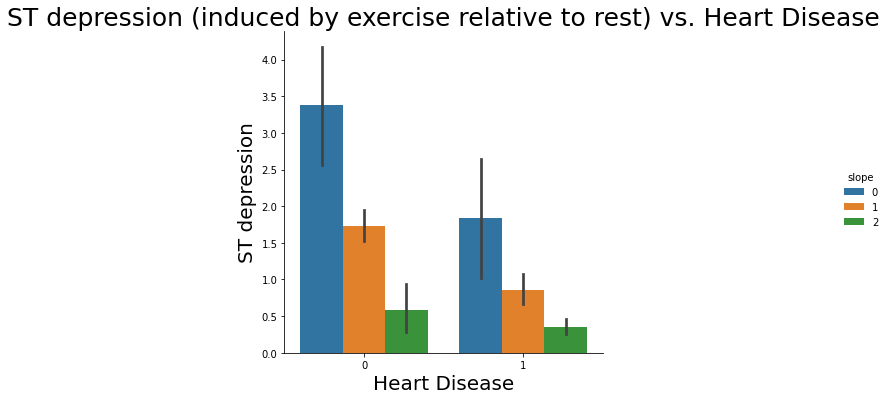

In [9]:
sb.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=df);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

# Having a Disease & not

In [10]:
# Disease
pos_data = df[df['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [11]:
# Not
neg_data = df[df['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [12]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 0.583030303030303
(Negative Patients ST depression): 1.5855072463768116


In [13]:
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))

(Positive Patients thalach): 158.46666666666667
(Negative Patients thalach): 139.1014492753623


# Creating new columns

<AxesSubplot:>

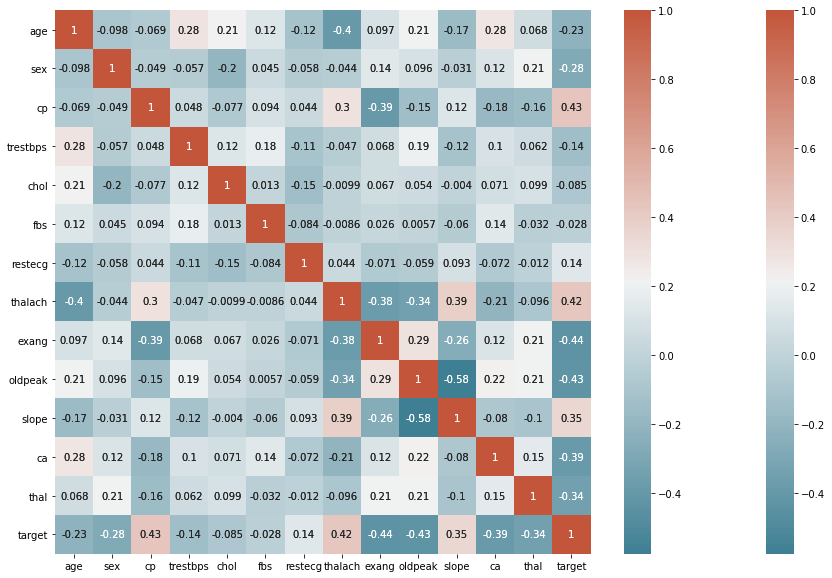

In [14]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.diverging_palette(220, 20, as_cmap=True))
sb.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sb.diverging_palette(220, 20, as_cmap=True))

In [15]:
df['slope*oldpeak'] = df['slope'] * df['oldpeak']
df['slope*thalach'] = df['slope'] * df['thalach']
df['oldpeak*thalach'] = df['oldpeak'] * df['thalach']
df['exang*oldpeak'] = df['exang'] * df['oldpeak']
df['exang*cp'] = df['exang'] * df['cp']
df['fbs*chol'] = df['fbs'] * df['chol']

# Nice Report for the data

In [16]:
#import sys
#!{sys.executable} -m pip install pandas-profiling
#from pandas_profiling import ProfileReport


In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,slope*oldpeak,slope*thalach,oldpeak*thalach,exang*oldpeak,exang*cp,fbs*chol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.0,0,345.0,0.0,0,233
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.0,0,654.5,0.0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2.8,344,240.8,0.0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1.6,356,142.4,0.0,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1.2,326,97.8,0.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.2,123,24.6,0.2,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1.2,132,158.4,0.0,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,3.4,141,479.4,0.0,0,193
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1.2,115,138.0,1.2,0,0


In [18]:
cat_vars  = ['sex', 'cp', 'fbs','restecg','exang','ca','slope','thal','exang*cp']        
num_vars  = ['age', 
             'trestbps',
             'chol',
             'thalach',
             'oldpeak',
             'slope*oldpeak',
             'slope*thalach',
            'oldpeak*thalach',
             'exang*oldpeak',
             'fbs*chol'
            ] 

X = df[cat_vars + num_vars]
y = df.target
print("\nNumerical features:\n", num_vars)
print("\nCategorical features:\n", cat_vars)


Numerical features:
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope*oldpeak', 'slope*thalach', 'oldpeak*thalach', 'exang*oldpeak', 'fbs*chol']

Categorical features:
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'slope', 'thal', 'exang*cp']


# Preprocessing

In [19]:
cat_4_treeModels = pipeline.Pipeline(steps=[
  ('ordinal', preprocessing.OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan))
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('cat', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

display(tree_prepro)

######################################

num_4_multModels = pipeline.Pipeline(steps=[
  ('scalar', preprocessing.QuantileTransformer(n_quantiles=200, output_distribution='normal', random_state=10))
])

cat_4_multModels = pipeline.Pipeline(steps=[
  ('onehot', preprocessing.OneHotEncoder(handle_unknown="ignore"))
])

mult_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_multModels, num_vars),
    ('cat', cat_4_multModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

display(mult_prepro)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca',
                                  'slope', 'thal', 'exang*cp'])])

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scalar',
                                                  QuantileTransformer(n_quantiles=200,
                                                                      output_distribution='normal',
                                                                      random_state=10))]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak', 'slope*oldpeak', 'slope*thalach',
                                  'oldpeak*thalach', 'exang*oldpeak',
                                  'fbs*chol']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca',
                                  'slope', 'thal', 'exang*cp'])])

# Modelling

In [20]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

# Multiplicative models
from sklearn.svm            import SVR
from sklearn.linear_model   import Lasso
from sklearn.linear_model   import SGDRegressor
from sklearn.linear_model   import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors      import KNeighborsRegressor

In [21]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(random_state=0),
  "Extra Trees":ExtraTreesClassifier(random_state=0),
  "Random Forest":RandomForestClassifier(random_state=0),
  "AdaBoost":AdaBoostClassifier(random_state=0),
  "Skl GBM":GradientBoostingClassifier(random_state=0),
  "Skl HistGBM":GradientBoostingClassifier(random_state=0),
  "XGBoost":XGBClassifier(random_state=0),
  "LightGBM":LGBMClassifier(random_state=0),
  "CatBoost":CatBoostClassifier(random_state=0)
}

mult_classifiers = {
  "SVR": SVR(),
  "Lasso": Lasso(),
  "SDG regr": SGDRegressor(),
  "Neural regr": MLPRegressor(random_state=73),
  "KNN regr": KNeighborsRegressor(n_neighbors=10),
  "Ridge": Ridge(alpha=0.6, random_state=73)
}

tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
mult_classifiers = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_classifiers.items()}

all_pipelines = {**tree_classifiers, **mult_classifiers}
tree_classifiers["LightGBM"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'ca',
                                                   'slope', 'thal',
                                                   'exang*cp'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=0))])

# Oversampling 

In [23]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

x_train, x_val, y_train, y_val = model_selection.train_test_split(X_resampled, y_resampled,
    test_size=0.2,
    stratify = y,
    random_state=4)

ValueError: Found input variables with inconsistent numbers of samples: [330, 303]

In [ ]:
results = pd.DataFrame({'Model': [], 'MSE': [],'Accuracy':[],'RMSE': [], 'Time': []})

for name, pipe in all_pipelines.items():

    start_time = time.time()
    preds = 0
    # YOUR CODE HERE
    pipe.fit(x_train, y_train)

    preds = pipe.predict(x_val)

    mse = sum((y_val - preds)**2) / preds.shape[0]
    rmse = np.sqrt(mse)

    total_time = time.time() - start_time
    accuracy = metrics.accuracy_score(y_val, preds)*100
    
    results = results.append({"Model": name,
                              'Accuracy': accuracy,
                              "MSE":   mse,
                              "RMSE":  rmse,
                              "Time":  total_time},
                              ignore_index=True)
    
    
    results_ord = results.sort_values(by=['RMSE'], ascending=True, ignore_index=True)
    results_ord.index += 1 
    clear_output()
    display(results_ord.style.bar(subset=['MSE', 'RMSE'], vmin=0, color='#5fba7d'))

NameError: name 'x_train' is not defined

# Best Model SDG regr

In [ ]:
lgbm = pipeline.make_pipeline(tree_prepro, LGBMClassifier(random_state=0)) # highest classifier accuracy

In [ ]:
lgbm.fit(x_train,y_train)
preds = lgbm.predict(x_val)


In [ ]:
preds

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score = accuracy_score(y_val, preds)
confusion_matrix = confusion_matrix(y_val, preds)
display(confusion_matrix)
display(accuracy_score) # Accuracy
# 6 False negative
# 1 False Positive

array([[22,  6],
       [ 1, 32]])

0.8852459016393442

In [ ]:
print(confusion_matrix[0].sum())# target is 0
print(confusion_matrix[1].sum())# target is 1

target_0_all = confusion_matrix[0]
target_1_all = confusion_matrix[1]

target_0_true_pos = target_0_all[0]
target_0_false_neg = target_0_all[1]

target_1_false_pos = target_1_all[0]
target_1_true_neg = target_1_all[1]

acc_target_1_right = target_1_true_neg/(target_1_true_neg+target_1_false_pos)
print(acc_target_1_right)

acc_target_0_right = target_0_true_pos/(target_0_true_pos+target_1_false_pos)
print(acc_target_0_right)

28
33
0.9696969696969697


# Gridsearch (not working because of pipeline//look it up later)

In [ ]:
lgbm[1].get_params

<bound method LGBMModel.get_params of LGBMClassifier(random_state=0)>

In [ ]:
from sklearn.model_selection import GridSearchCV

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
param_grid = {
    'n_estimators': [400, 700, 1000],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200]
}

model, pred = algorithm_pipeline(x_train, x_val, y_train, y_val, lgbm, 
                                 param_grid, cv=5, scoring_fit='accuracy')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


ValueError: Invalid parameter colsample_bytree for estimator Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'ca',
                                                   'slope', 'thal',
                                                   'exang*cp'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=0))]). Check the list of available parameters with `estimator.get_params().keys()`.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea7ce3b3-a072-4534-8285-878511d24c52' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>